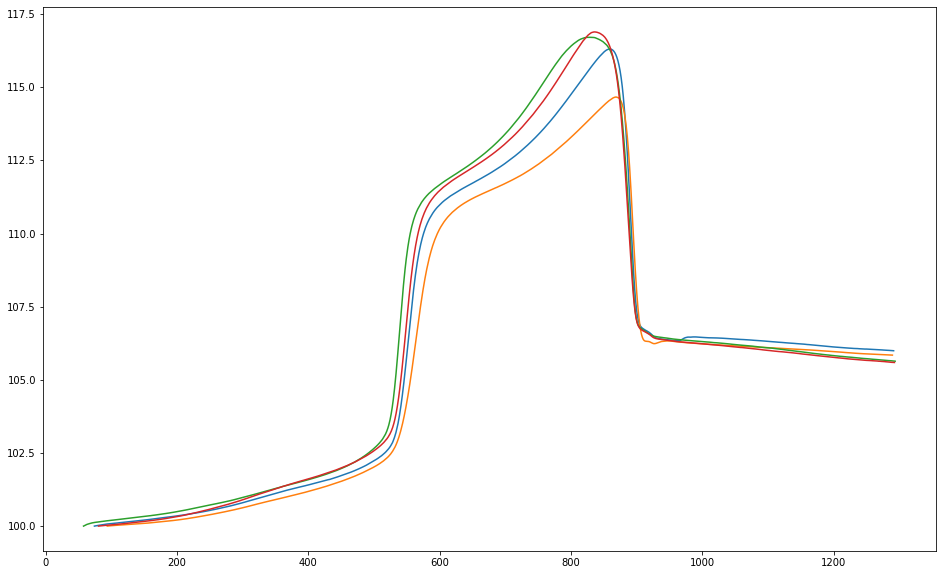

In [17]:
#Load 1 dataset
#Imports
from numpy import mean,std,array
from numpy.random import rand
from numpy import exp as np_exp

#Utilitary functions
def normalize(df):
    "Normalize x and y. Set min(y) to 0"""
    m_x,m_y = mean(df.x),mean(df.y)
    s_x,s_y = std(df.x),std(df.y)
    
    dfn = (df.copy())
    dfn.x = (df.x - m_x)/s_x 
    dfn.y = (df.y - m_y)/s_y
    dfmin = min(dfn.y)
    dfn.y -= dfmin
    return dfn.reset_index(drop=1),(m_x,m_y,s_x,s_y)

from pandas import read_csv
def LoadDF(name,dom=(210,400),weight=(-0.3,1.6,0.3)):
    """name = /path/to/file to load
    dom: Clean data. Cut from t=dom[0] to t=dom[1]. This is determined by plotting t vs T. 
        Default values ar ok for this datasets
    weight: Give importance to data in the range from (-0.3,1.2) by a factor of 0.7"""    
    df = (read_csv(name,encoding='utf-16',
                   skiprows=80,header=None,sep='[ ,\t]',
                   engine='python',names=['t','x','W','H','c','v','f'])
          .astype(float)
          .drop(columns=['H','c','v','f']))

    df = df[(df['t'] > dom[0]) & (df['t'] < dom[1] )].reset_index(drop=True) 
    df['W/%']=df['W']*100.0/df['W'].iloc[0]
    df.columns = ['t','x','W','y']
    
    dfn,norm_prms = normalize(df)
    #dfR=weigh(dfn,0.5,Range=(0.0,1e-5))
    #dfR=weigh(dfR,weight[2],Range=(weight[0],weight[1]))

    return df#n,norm_prms

names = !ls data/La0.9*txt
dfs = {}
for name in names:
    dfs[name] = LoadDF(name,dom=(210,600))
    
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(16,10))
for name in names:
    df = dfs[name]
    ax.plot(df.x,df.y)
    
plt.show()